In [11]:
import cv2
import os
import numpy as np
import seaborn as sns
import open3d as o3d
from matplotlib import pyplot as plt
from open3d.web_visualizer import draw
from mpl_toolkits.mplot3d import Axes3D
current_palette = sns.color_palette('bright',10)

from utilities.dataset import ContactPose
import utilities.misc as mutils

In [19]:
intent = "use"
subj_id = "28"
obj_class = "apple"

In [20]:
pcd = o3d.io.read_point_cloud("./data/contactpose_data/full"+subj_id+"_use/"+obj_class+"/" + obj_class+".ply") # Read the point cloud
cp = ContactPose(int(subj_id), intent, obj_class)

MANO code was not detected, please follow steps in README.md. mano_meshes() will return (None, None)


In [21]:
object_points = np.asarray(pcd.points) 
object_sample_id = np.random.choice(object_points.shape[0], 2048, replace=False)
object_points = object_points[object_sample_id]

In [22]:
left_hand_joint = cp.hand_joints()[0]
right_hand_joint = cp.hand_joints()[1]

In [23]:
len(object_points)

2048

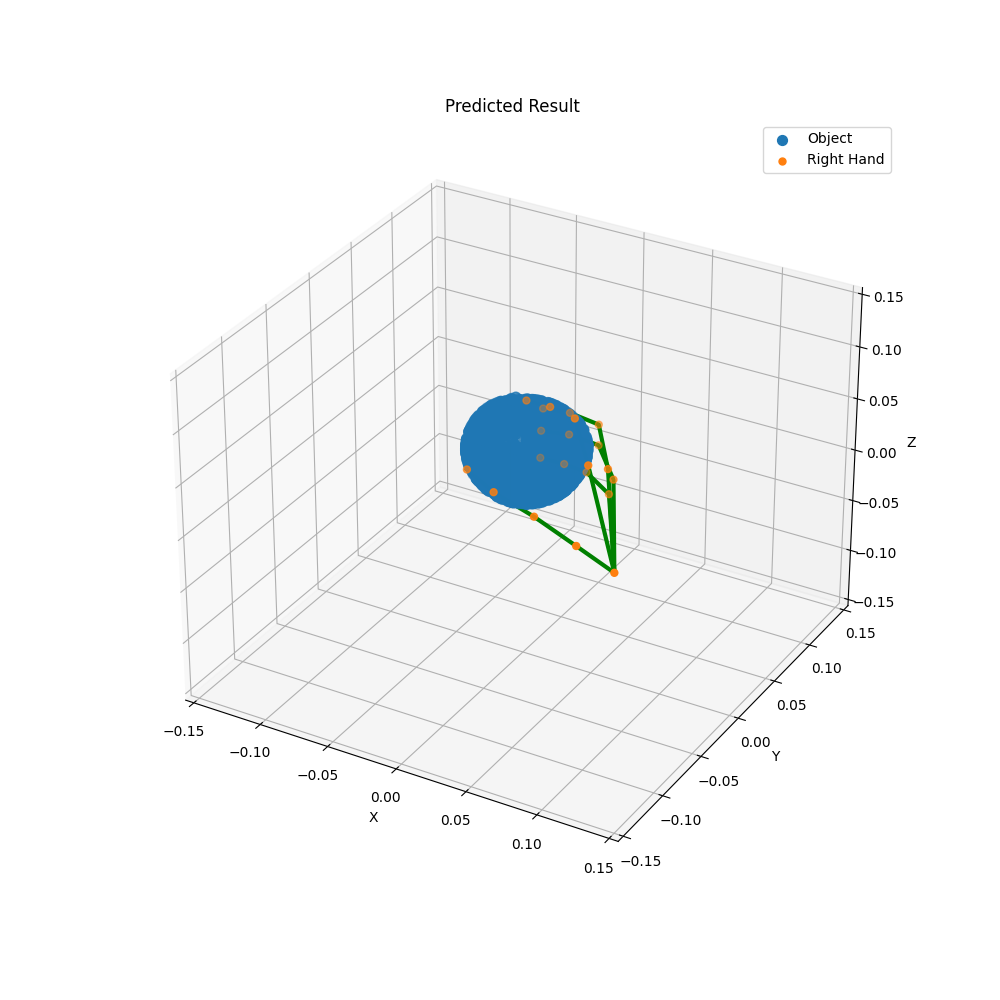

In [55]:
%matplotlib widget

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-0.15,0.15)
ax.set_ylim(-0.15,0.15)
ax.set_zlim(-0.15,0.15)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.scatter(object_points[:,0], object_points[:,1], object_points[:,2],marker='.', s=200, label='Object')

if left_hand_joint != None:
    ax.scatter(left_hand_joint[:,0], left_hand_joint[:,1], left_hand_joint[:,2],marker='.', s=100, label='Left Hand')
    ax.plot(left_hand_joint[:5][:,0], left_hand_joint[:5][:,1], left_hand_joint[:5][:,2], linewidth=3, color='r')
    ax.plot(np.concatenate(([left_hand_joint[0]], left_hand_joint[5:9]))[:,0], np.concatenate(([left_hand_joint[0]], left_hand_joint[5:9]))[:,1], np.concatenate(([left_hand_joint[0]], left_hand_joint[5:9]))[:,2], linewidth=3, color='r')
    ax.plot(np.concatenate(([left_hand_joint[0]], left_hand_joint[9:13]))[:,0], np.concatenate(([left_hand_joint[0]], left_hand_joint[9:13]))[:,1], np.concatenate(([left_hand_joint[0]], left_hand_joint[9:13]))[:,2], linewidth=3, color='r')
    ax.plot(np.concatenate(([left_hand_joint[0]], left_hand_joint[13:17]))[:,0],np.concatenate(([left_hand_joint[0]], left_hand_joint[13:17]))[:,1], np.concatenate(([left_hand_joint[0]], left_hand_joint[13:17]))[:,2], linewidth=3, color='r')
    ax.plot(np.concatenate(([left_hand_joint[0]], left_hand_joint[17:21]))[:,0], np.concatenate(([left_hand_joint[0]], left_hand_joint[17:21]))[:,1] , np.concatenate(([left_hand_joint[0]], left_hand_joint[17:21]))[:,2], linewidth=3, color='r')

ax.scatter(right_hand_joint[:,0], right_hand_joint[:,1], right_hand_joint[:,2],marker='.', s=100,  label='Right Hand')
ax.plot(right_hand_joint[:5][:,0], right_hand_joint[:5][:,1], right_hand_joint[:5][:,2], linewidth=3, color='g')
ax.plot(np.concatenate(([right_hand_joint[0]], right_hand_joint[5:9]))[:,0], np.concatenate(([right_hand_joint[0]], right_hand_joint[5:9]))[:,1], np.concatenate(([right_hand_joint[0]], right_hand_joint[5:9]))[:,2], linewidth=3, color='g')
ax.plot(np.concatenate(([right_hand_joint[0]], right_hand_joint[9:13]))[:,0], np.concatenate(([right_hand_joint[0]], right_hand_joint[9:13]))[:,1], np.concatenate(([right_hand_joint[0]], right_hand_joint[9:13]))[:,2], linewidth=3, color='g')
ax.plot(np.concatenate(([right_hand_joint[0]], right_hand_joint[13:17]))[:,0],np.concatenate(([right_hand_joint[0]], right_hand_joint[13:17]))[:,1], np.concatenate(([right_hand_joint[0]], right_hand_joint[13:17]))[:,2], linewidth=3, color='g')
ax.plot(np.concatenate(([right_hand_joint[0]], right_hand_joint[17:21]))[:,0], np.concatenate(([right_hand_joint[0]], right_hand_joint[17:21]))[:,1] , np.concatenate(([right_hand_joint[0]], right_hand_joint[17:21]))[:,2], linewidth=3, color='g')

    
ax.set_title('Predicted Result')
ax.legend()
plt.show()

In [64]:
root = "./data/contactpose_data/"
for folder in os.listdir(root):
    if "use" in folder:
        print(len(os.listdir(root + folder)))
        print(os.listdir(root + folder))
        # for folder in os.listdir(root + folder):
        #     print(folder)

27
['stapler', 'knife', 'hands', 'mouse', 'ps_controller', 'apple', 'eyeglasses', 'pan', 'headphones', 'mug', 'utah_teapot', 'palm_print', 'flashlight', 'water_bottle', 'wine_glass', 'camera', 'binoculars', 'light_bulb', 'toothbrush', 'cell_phone', 'hammer', 'toothpaste', 'banana', 'bowl', 'door_knob', 'cup', 'scissors']
27
['stapler', 'knife', 'hands', 'mouse', 'ps_controller', 'apple', 'eyeglasses', 'pan', 'headphones', 'mug', 'utah_teapot', 'palm_print', 'flashlight', 'water_bottle', 'wine_glass', 'camera', 'binoculars', 'light_bulb', 'toothbrush', 'cell_phone', 'hammer', 'toothpaste', 'banana', 'bowl', 'door_knob', 'cup', 'scissors']
25
['stapler', 'knife', 'hands', 'mouse', 'ps_controller', 'apple', 'eyeglasses', 'pan', 'headphones', 'mug', 'utah_teapot', 'palm_print', 'flashlight', 'wine_glass', 'camera', 'binoculars', 'light_bulb', 'toothbrush', 'cell_phone', 'hammer', 'toothpaste', 'bowl', 'door_knob', 'cup', 'scissors']
27
['stapler', 'knife', 'hands', 'mouse', 'ps_controller'